In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

'''import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))'''

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"import os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))"

In [2]:
import pandas as pd
import numpy as np
import cv2
import os
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
import time
from tqdm import tqdm
from pathlib import Path
import urllib

import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

from random import choice
from json import load
from io import BytesIO
import PIL.Image
import IPython.display
from joblib import load, dump

from math import trunc, ceil

import torch
import torch.nn as nn

from tqdm import tqdm

In [3]:
def getTrainImgPath(imageId):
    return "./input/bms-molecular-translation/train/{}/{}/{}/{}.png".format(
        imageId[0], imageId[1], imageId[2], imageId)
def getTestImgPath(imageId):
    return "./input/bms-molecular-translation/test/{}/{}/{}/{}.png".format(
        imageId[0], imageId[1], imageId[2], imageId)

In [4]:
train = pd.read_csv('./input/bms-molecular-translation/train_labels.csv')
test = pd.read_csv('./input/bms-molecular-translation/sample_submission.csv')

trainPaths = train.image_id.apply(getTrainImgPath)
testPaths = test.image_id.apply(getTestImgPath)

train["InChI"] = train.InChI.astype('category')
test["InChI"] = test.InChI.astype('category')

train["Path"] = pd.Series(trainPaths)
test["Path"] = pd.Series(testPaths)


train
num_classes = train['InChI'].value_counts().count()
print("Number of classes: {}".format(num_classes))

Number of classes: 2424186


original


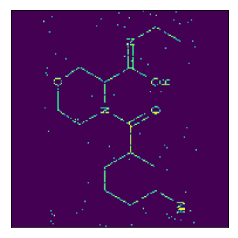

pre-process 1


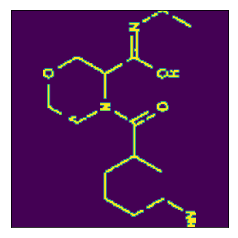

pre-process 2


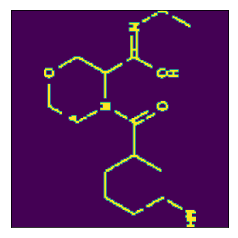

In [12]:
import sys
np.set_printoptions(threshold=sys.maxsize)
def loadImage(size, path, denoise, f2=False):
    img = 255-cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    
    if denoise:
        kernel = np.ones((5,5),np.uint8)/25
        imgN = img.copy()
        imgN = cv2.filter2D(imgN, -1, kernel)

        _, imgN = cv2.threshold(imgN,30,255,cv2.THRESH_BINARY)
        img = cv2.bitwise_and(img, imgN)
        
        kernel = np.ones((2,2),np.uint8)
        img = cv2.dilate(img, kernel)

        if not f2:
            kernel = np.ones((2,2),np.uint8)
            img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    
    img = img[0<img.sum(axis=1), :]
    img = img[:, 0<img.sum(axis=0)]
    
    center = size // 2
    h, w = img.shape
        
    scale = size / max(h, w)
    img = cv2.resize(img, (trunc(scale * w), trunc(scale * h)))

    h, w = img.shape
    center_x, center_y = ceil(w / 2), ceil(h / 2)

    _out = np.zeros((size, size), dtype=np.uint8)
    y = center-center_y
    x = center-center_x
    _out[y:y+h, x:x+w] = img
    
    
    plt.imshow(_out)
    plt.xticks([]), plt.yticks([]) 
    plt.show()
    return _out

for i in range(1):
    #p = choice(testPaths)
    p = './input/bms-molecular-translation/test/d/0/f/d0f80c6870a3.png'
    print("original")
    loadImage(500, p, False)
    print("pre-process 1")
    loadImage(500, p, True, True)
    print("pre-process 2")
    loadImage(500, p, True, False)
    
#image = loadImage(500, p, True, True)
#plt.imshow(image)

In [ ]:
## Create JSON file for AoA 
import json

[{ file_path: 'path/img.jpg', captions: ['a caption', ...] }, ...]

obj = []




with open('ichi.json', 'w') as f:
    json.dump(obj, f)